In [1]:
from statsmodels.tsa.api import AutoReg, VAR
from geopy.distance import great_circle
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np

In [62]:
data = pd.read_csv(r"C:\Users\VY72PC\OneDrive - ING\Documents\STARIMA Project\Data\pm25_weer.csv")
data

,id,no2,pm10,pm10_cal,pm10_fac,pm10_max,pm10_min,pm25,pm25_cal,pm25_fac,...,YYYYMMDD,jaar,maand,weeknummer,dag,H,T,U,DD,FH
0,1,NaN,8.195,8.774,1.070000,8.39,8.00,4.000,1.640,0.410000,...,20190712,2019,7,28,12,14,173,86,320,60
1,4,NaN,17.258,18.165,1.052000,20.10,15.60,11.176,4.256,0.381000,...,20190712,2019,7,28,12,14,173,86,320,60
2,5,NaN,19.952,20.497,1.027000,24.40,16.50,10.810,3.996,0.370000,...,20190712,2019,7,28,12,14,173,86,320,60
3,7,NaN,20.278,21.216,1.042000,24.40,16.20,11.510,4.292,0.371000,...,20190712,2019,7,28,12,14,173,86,320,60
4,10,NaN,18.099,19.186,1.062000,21.90,14.70,8.942,3.471,0.390000,...,20190712,2019,7,28,12,14,173,86,320,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349808,199,33.4319,24.660,16.796,0.681103,28.50,20.50,11.910,9.877,0.829303,...,20221022,2022,10,42,22,23,127,92,140,20
1349809,200,43.1974,0.000,0.000,NaN,0.00,0.00,0.000,0.000,NaN,...,20221022,2022,10,42,22,23,127,92,140,20
1349810,212,2.5000,23.074,22.407,0.971261,29.30,18.29,7.887,11.534,1.461850,...,20221022,2022,10,42,22,23,127,92,140,20
1349811,213,39.1156,37.694,36.569,0.970257,60.80,24.40,9.182,13.432,1.463180,...,20221022,2022,10,42,22,23,127,92,140,20


In [68]:
data.columns

0          320
1          320
2          320
3          320
4          320
          ... 
1349808    140
1349809    140
1349810    140
1349811    140
1349812    140
Name: DD, Length: 1349813, dtype: int64

In [75]:
print(data["T"].unique())
print(data["U"].unique())
# print(data[data.DD == 990])

[173 177 175 198  45  46  54  51  48  44  41  63  40  42  37  38  43  47
  56  73  77  79  80  76  69  64  53  52  49  71  70  65  72  84  59  50
  62  57  66  85  78  87  90  81  75  82  74  83  96 125 129 126 124 106
  97  67  60  68  61  55 114  88  93 100 107 128 122 121 118 119 117 115
 112 105 109 116 103 101  92  58  91  89  95  94  98  11  36  26  28  35
  27  25  17  13   8   2   4  -1  -6  -5 -10 -21   7  23  16  18  12  10
   3  -2   1   5  32  34  29  24  14  31  33  21  22  19   9  20  30  15
  86 102 110 108  99 111 113 123 120  39  -7  -3 104   0 131 127 132 133
 145 138 135 -20 -15 -13  -8 139 140 143 159 186 191 194 183 171 150 142
 164 187 206 170 154 130 148 167 172 176 179 180 178 163 144 153 195 203
 205 210 218 216 211 168 188 161 137 152 158 156 147 169 192 151 199 190
 184 182 149 165 181 141 134 136 146 162 157 185 160 193 201 204 155 174
 200 209 215 224 223 166 189 202 212 214 207 220 228 233 197 208 196 213
 229 235 246 250 260 261 255 249 234 226 217 225 23

In [63]:
data.drop(data.iloc[:, 0:7], axis=1, inplace=True)
data.drop(["jaar", "maand", "weeknummer", "#STN", "timestamp", "components", "dag", "tijd", "datum", "H", "weekdag", "FH", "sensortype"], axis=1, inplace=True)
data

,pm25,pm25_cal,pm25_fac,pm25_max,pm25_min,latitude,longitude,name,tag,uur,YYYYMMDD,T,U,DD
0,4.000,1.640,0.410000,4.1,3.9,52.472796,4.662902,Zuiderkade,Beverwijk,14,20190712,173,86,320
1,11.176,4.256,0.381000,12.4,10.1,52.490108,4.657723,Grote Houtweg,Beverwijk,14,20190712,173,86,320
2,10.810,3.996,0.370000,12.3,9.0,52.484320,4.642918,Westerhoutplein,Beverwijk,14,20190712,173,86,320
3,11.510,4.292,0.371000,13.9,10.0,52.487020,4.650807,Beukenstraat,Beverwijk,14,20190712,173,86,320
4,8.942,3.471,0.390000,10.3,7.3,52.477398,4.658354,Parallelweg,Beverwijk,14,20190712,173,86,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349808,11.910,9.877,0.829303,15.2,10.3,52.473001,4.662653,Zuiderkade,Beverwijk,23,20221022,127,92,140
1349809,0.000,0.000,NaN,0.0,0.0,52.477803,4.654015,Stationsplein,Beverwijk,23,20221022,127,92,140
1349810,7.887,11.534,1.461850,8.7,7.2,52.458385,4.834105,Fluitekruidweg,Zaandam,23,20221022,127,92,140
1349811,9.182,13.432,1.463180,10.5,8.3,52.458385,4.834105,Fluitekruidweg,Zaandam,23,20221022,127,92,140


In [6]:
data = data[data.pm25 != 0]
data

,pm25,pm25_cal,pm25_fac,pm25_max,pm25_min,latitude,longitude,name,tag,uur,YYYYMMDD
0,4.000,1.640,0.410000,4.1,3.9,52.472796,4.662902,Zuiderkade,Beverwijk,14,20190712
1,11.176,4.256,0.381000,12.4,10.1,52.490108,4.657723,Grote Houtweg,Beverwijk,14,20190712
2,10.810,3.996,0.370000,12.3,9.0,52.484320,4.642918,Westerhoutplein,Beverwijk,14,20190712
3,11.510,4.292,0.371000,13.9,10.0,52.487020,4.650807,Beukenstraat,Beverwijk,14,20190712
4,8.942,3.471,0.390000,10.3,7.3,52.477398,4.658354,Parallelweg,Beverwijk,14,20190712
...,...,...,...,...,...,...,...,...,...,...,...
1349807,3.815,3.306,0.865445,6.6,2.7,52.493494,4.690449,Schutterskwartier,Heemskerk,23,20221022
1349808,11.910,9.877,0.829303,15.2,10.3,52.473001,4.662653,Zuiderkade,Beverwijk,23,20221022
1349810,7.887,11.534,1.461850,8.7,7.2,52.458385,4.834105,Fluitekruidweg,Zaandam,23,20221022
1349811,9.182,13.432,1.463180,10.5,8.3,52.458385,4.834105,Fluitekruidweg,Zaandam,23,20221022


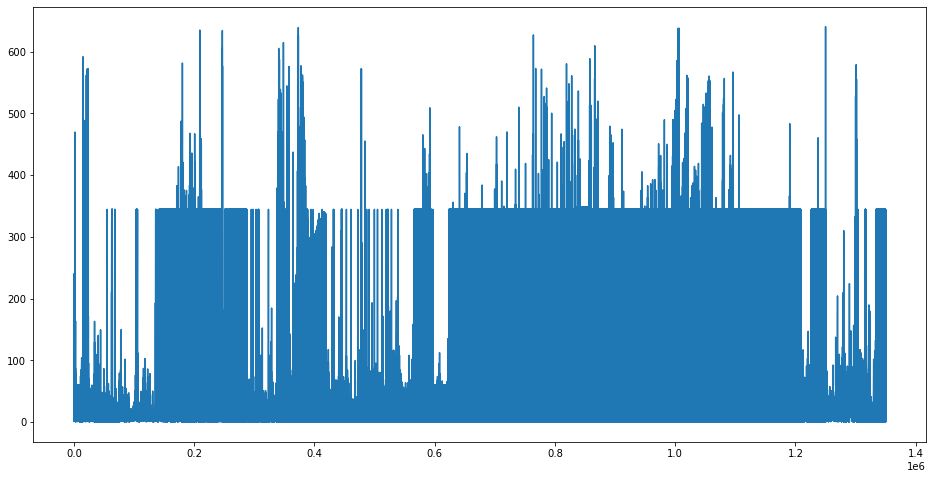

In [7]:
plt.figure(figsize=(16, 8))
plt.plot(data["pm25"])
plt.show()

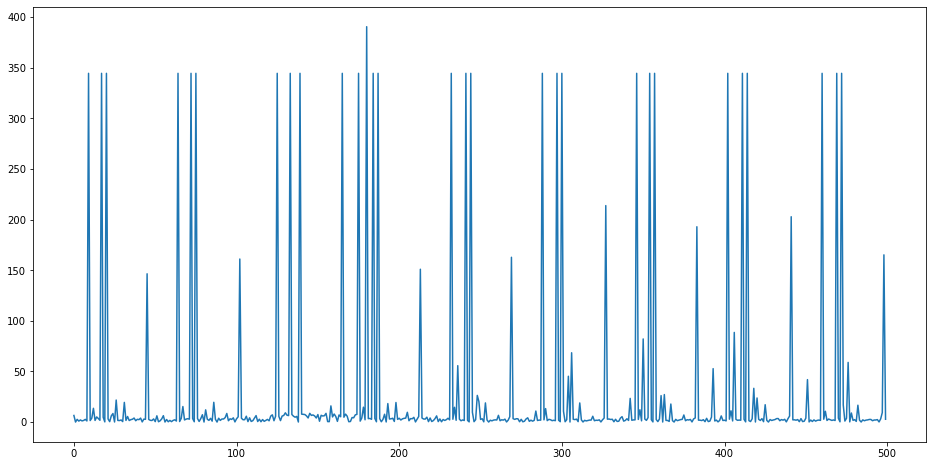

In [9]:
data3 = data["pm25"].to_numpy()

plt.figure(figsize=(16, 8))
plt.plot(data3[700000:700500])
plt.show()

In [10]:
grouped_df = data.groupby(["YYYYMMDD", "tag"])[("pm25", "longitude", "latitude")].mean().copy().reset_index()

<ipython-input-10-6cd7b986f18e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = data.groupby(["YYYYMMDD", "tag"])[("pm25", "longitude", "latitude")].mean().copy().reset_index()


In [11]:
grouped_df.head(5)

,YYYYMMDD,tag,pm25,longitude,latitude
0,20190625,Amsterdam,16.602565,4.866208,52.359714
1,20190625,Beverwijk,23.527500,4.651260,52.491813
2,20190626,Amsterdam,21.974609,4.866208,52.359714
3,20190626,Beverwijk,2.851417,4.657933,52.485871
4,20190627,Amsterdam,4.484500,4.866208,52.359714


In [12]:
Locations = grouped_df["tag"].unique()
LocDict = dict()
Locations
for i in range(len(Locations)):
    LocDict[Locations[i]] = (grouped_df[grouped_df.tag == Locations[i]]["latitude"].mean(), grouped_df[grouped_df.tag == Locations[i]]["longitude"].mean())

In [13]:
LocDict

{'Amsterdam': (52.38561196440265, 4.90134557853),
 'Beverwijk': (52.486678154171095, 4.6586078747287045),
 'Heemskerk': (52.506322317576725, 4.672040573028687),
 'Wijk aan Zee': (52.49345636398648, 4.598232541747149),
 'Velsen-Noord': (52.473822978979044, 4.647238045359573),
 'Driehuis': (52.447194805956656, 4.636977076965579),
 'IJmuiden': (52.45822197205162, 4.61498710184251),
 'Velsen-Zuid': (52.46234499999992, 4.637255999999982),
 'Zaandam': (52.45848181178818, 4.824912605192308),
 'Koog aan de Zaan': (52.46407900000035, 4.811263999999972),
 'Uithoorn': (52.23809099999961, 4.808228999999986)}

In [14]:
W = np.zeros((11, 11))

for i in range(len(LocDict)):
    for j in range(len(LocDict)):
        if i != j:
            W[i, j] = 1 / great_circle(LocDict[Locations[i]], LocDict[Locations[j]]).km
pd.DataFrame(W)


,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.050185,0.048698,0.042035,0.050442,0.052103,0.047551,0.050413,0.103965,0.093890,0.056874
1,0.050185,0.000000,0.422644,0.240575,0.615906,0.216056,0.230991,0.325950,0.085524,0.093983,0.033956
2,0.048698,0.422644,0.000000,0.192420,0.250948,0.143053,0.151561,0.184237,0.085918,0.094942,0.032024
3,0.042035,0.240575,0.192420,0.000000,0.251750,0.173164,0.245163,0.229703,0.063141,0.067602,0.031472
4,0.050442,0.615906,0.250948,0.251750,0.000000,0.328792,0.358455,0.692351,0.082260,0.089576,0.035210
5,0.052103,0.216056,0.143053,0.173164,0.328792,0.000000,0.518199,0.593566,0.078144,0.083627,0.038463
6,0.047551,0.230991,0.151561,0.245163,0.358455,0.518199,0.000000,0.634160,0.070306,0.075109,0.036004
7,0.050413,0.325950,0.184237,0.229703,0.692351,0.593566,0.634160,0.000000,0.078608,0.084816,0.036354
8,0.103965,0.085524,0.085918,0.063141,0.082260,0.078144,0.070306,0.078608,0.000000,0.897146,0.040762
9,0.093890,0.093983,0.094942,0.067602,0.089576,0.083627,0.075109,0.084816,0.897146,0.000000,0.039794


In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(grouped_df["pm25"])
plt.show()

In [15]:
data2 = grouped_df.copy()
data2["New"] = data2["YYYYMMDD"].astype(str) #+ "-" +data2["uur"].astype(str)
del data2["YYYYMMDD"]

In [16]:
data2.set_index("New", inplace=True)

In [17]:
del data2["latitude"]
del data2["longitude"]
data2

,tag,pm25
New,,
20190625,Amsterdam,16.602565
20190625,Beverwijk,23.527500
20190626,Amsterdam,21.974609
20190626,Beverwijk,2.851417
20190627,Amsterdam,4.484500
...,...,...
20221022,IJmuiden,8.756045
20221022,Uithoorn,7.120000
20221022,Velsen-Noord,6.428708


In [18]:
UniqueNames = data2.tag.unique()

DataFrameDict = {elem : pd.DataFrame() for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data2[:][data2.tag == key]

In [19]:
DataFrameDict["Amsterdam"]

,tag,pm25
New,,
20190625,Amsterdam,16.602565
20190626,Amsterdam,21.974609
20190627,Amsterdam,4.484500
20190628,Amsterdam,7.430917
20190629,Amsterdam,7.474792
...,...,...
20221018,Amsterdam,62.397567
20221019,Amsterdam,51.639809
20221020,Amsterdam,62.126931


In [20]:
for key in tqdm(DataFrameDict):
    print(key)
    plt.figure(figsize=(16, 8))
    plt.plot(DataFrameDict[key].pm25, label = key)
    plt.show()

  0%|          | 0/11 [00:00<?, ?it/s]

Amsterdam


  0%|          | 0/11 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [24]:
for key in tqdm(DataFrameDict):
    DataFrameDict[key].rename(columns={"pm25":key}, inplace=True)
    del DataFrameDict[key]["tag"]
    print(DataFrameDict[key])

100%|██████████| 11/11 [00:00<00:00, 209.56it/s]

          Amsterdam
New                
20190625  16.602565
20190626  21.974609
20190627   4.484500
20190628   7.430917
20190629   7.474792
...             ...
20221018  62.397567
20221019  51.639809
20221020  62.126931
20221021  73.267709
20221022  62.699718

[1195 rows x 1 columns]
          Beverwijk
New                
20190625  23.527500
20190626   2.851417
20190627   4.010603
20190628   5.533953
20190629   9.006055
...             ...
20221018  56.889090
20221019  57.571965
20221020  70.835828
20221021  71.279301
20221022  57.537308

[1200 rows x 1 columns]
          Heemskerk
New                
20190702   3.702000
20190703   2.701783
20190704   2.456625
20190705   4.618917
20190706   6.488875
...             ...
20221018   5.499161
20221019   6.522591
20221020  20.398967
20221021  11.827651
20221022   5.832736

[1186 rows x 1 columns]
          Wijk aan Zee
New                   
20190703      2.059048
20190704      1.748930
20190705      7.951859
20190706      6.433143
2019070

In [ ]:
for key in tqdm(DataFrameDict):
    model = AutoReg(DataFrameDict[key], lags=1).fit()
    print(f'{key}\n', model.params)

In [25]:
for key in DataFrameDict:
    print(key)

Amsterdam
Beverwijk
Heemskerk
Wijk aan Zee
Velsen-Noord
Driehuis
IJmuiden
Velsen-Zuid
Zaandam
Koog aan de Zaan
Uithoorn


In [ ]:
for key in tqdm(DataFrameDict):
    for key2 in tqdm(DataFrameDict):
        idx1 = DataFrameDict[key].index
        idx2 = DataFrameDict[key2].index
        print(len(idx1.difference(idx2)))

In [26]:
df = pd.DataFrame(DataFrameDict["Amsterdam"].copy())
for key in DataFrameDict:
    df = df.combine_first(DataFrameDict[key])
df

,Amsterdam,Beverwijk,Driehuis,Heemskerk,IJmuiden,Koog aan de Zaan,Uithoorn,Velsen-Noord,Velsen-Zuid,Wijk aan Zee,Zaandam
New,,,,,,,,,,,
20190625,16.602565,23.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190626,21.974609,2.851417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190627,4.484500,4.010603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190628,7.430917,5.533953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190629,7.474792,9.006055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20221018,62.397567,56.889090,7.785098,5.499161,5.858405,NaN,5.980941,5.637824,NaN,117.669196,7.467459
20221019,51.639809,57.571965,11.062278,6.522591,7.833317,NaN,5.646750,6.915667,NaN,117.688819,5.922350
20221020,62.126931,70.835828,36.090788,20.398967,31.854394,NaN,27.862864,25.996136,NaN,130.220561,23.761873


In [27]:
for column in df:
    mean_value = df[column].mean()
    df[column].fillna(value=mean_value, inplace = True)
df

,Amsterdam,Beverwijk,Driehuis,Heemskerk,IJmuiden,Koog aan de Zaan,Uithoorn,Velsen-Noord,Velsen-Zuid,Wijk aan Zee,Zaandam
New,,,,,,,,,,,
20190625,16.602565,23.527500,12.851287,18.185365,11.381489,15.218245,29.655720,10.479118,11.120823,25.257502,12.379348
20190626,21.974609,2.851417,12.851287,18.185365,11.381489,15.218245,29.655720,10.479118,11.120823,25.257502,12.379348
20190627,4.484500,4.010603,12.851287,18.185365,11.381489,15.218245,29.655720,10.479118,11.120823,25.257502,12.379348
20190628,7.430917,5.533953,12.851287,18.185365,11.381489,15.218245,29.655720,10.479118,11.120823,25.257502,12.379348
20190629,7.474792,9.006055,12.851287,18.185365,11.381489,15.218245,29.655720,10.479118,11.120823,25.257502,12.379348
...,...,...,...,...,...,...,...,...,...,...,...
20221018,62.397567,56.889090,7.785098,5.499161,5.858405,15.218245,5.980941,5.637824,11.120823,117.669196,7.467459
20221019,51.639809,57.571965,11.062278,6.522591,7.833317,15.218245,5.646750,6.915667,11.120823,117.688819,5.922350
20221020,62.126931,70.835828,36.090788,20.398967,31.854394,15.218245,27.862864,25.996136,11.120823,130.220561,23.761873


In [28]:
VARModel = VAR(df).fit()
VARModel.summary()

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 15, Dec, 2022
Time:                     10:31:36
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                    39.7415
Nobs:                     1204.00    HQIC:                   39.3934
Log likelihood:          -42248.7    FPE:                1.03997e+17
AIC:                      39.1831    Det(Omega_mle):     9.32485e+16
--------------------------------------------------------------------
Results for equation Amsterdam
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       6.620700         1.144698            5.784           0.000
L1.Amsterdam                0.713634         0.037129           19.220           0.000
L1.Beverwijk                0.05

In [42]:
print("Legend")
i = 1
for key in DataFrameDict:
    print(key, "=", i)
    i += 1

Legend
Amsterdam = 1
Beverwijk = 2
Heemskerk = 3
Wijk aan Zee = 4
Velsen-Noord = 5
Driehuis = 6
IJmuiden = 7
Velsen-Zuid = 8
Zaandam = 9
Koog aan de Zaan = 10
Uithoorn = 11


In [52]:
WY = pd.DataFrame(np.matmul(df.to_numpy(), W))

i = 0
for key in DataFrameDict:
    WY.rename(columns={i:f'{key}'}, inplace=True)
    i += 1

WY

,Amsterdam,Beverwijk,Heemskerk,Wijk aan Zee,Velsen-Noord,Driehuis,IJmuiden,Velsen-Zuid,Zaandam,Koog aan de Zaan,Uithoorn
0,10.108110,34.948672,29.459848,26.808218,49.633619,39.722899,34.366159,54.236631,34.189075,22.097483,6.620207
1,9.070490,35.218266,20.982833,22.059884,37.170060,35.535610,29.845614,47.768091,32.979272,20.658675,6.223656
2,9.128663,34.340532,20.621031,21.603560,37.001779,34.874764,29.281701,47.264203,31.260057,19.125465,5.268279
3,9.205112,34.488397,21.408349,22.093892,38.088642,35.357411,29.773687,47.909275,31.696663,19.545273,5.487582
4,9.379358,34.490599,22.877948,22.931037,40.229346,36.109866,30.577798,49.043217,31.998174,19.875710,5.607977
...,...,...,...,...,...,...,...,...,...,...,...
1200,17.751164,30.123617,46.099240,33.570256,64.292852,36.976753,42.086180,52.393926,120.774241,25.314985,12.250650
1201,18.050156,32.720090,46.693663,34.574407,65.963126,38.386661,43.944091,54.013939,120.254437,24.948139,11.903897
1202,25.939103,75.092099,70.151889,60.307504,107.360182,80.252064,76.996010,99.095627,142.513414,36.642252,17.026964
1203,22.320995,55.256761,61.970807,50.301382,91.949244,61.921828,62.661401,80.142082,133.789301,33.049347,15.669911


In [53]:
SVAR = VAR(WY).fit()
SVAR.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 15, Dec, 2022
Time:                     11:23:19
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                    15.7520
Nobs:                     1204.00    HQIC:                   15.4039
Log likelihood:          -27806.9    FPE:                3.96713e+06
AIC:                      15.1935    Det(Omega_mle):     3.55712e+06
--------------------------------------------------------------------
Results for equation Amsterdam
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       3.476602         0.459345            7.569           0.000
L1.Amsterdam                0.442540         0.288388            1.535           0.125
L1.Beverwijk                0.11